In [1]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F

In [2]:
!pip install quandl
import quandl
df = quandl.get("WIKI/GOOGL")

  Created wheel for inflection: filename=inflection-0.3.1-py3-none-any.whl size=6075 sha256=d2e2b65c22bf24637d7b25fd77585fe98cc05bc452e1e972ba67f26d6dda5beb
  Stored in directory: /root/.cache/pip/wheels/20/80/0f/19bee3c7f2cf5ca41fcc9cdc8ed94c88b9946872651cb5ee91
Successfully built inflection


In [3]:
df = df.drop('Ex-Dividend',axis=1)
df = df.drop('Split Ratio',axis=1)

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj. Open', 'Adj. High',
       'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [5]:
X = df.drop('Adj. Close',axis=1)
y = df[['Adj. Close']]

In [6]:
X_n = torch.Tensor(X.values)

In [7]:
y_n = torch.Tensor(y.values)

In [8]:
print(X_n.shape[1])
input_dim = X_n.shape[1]
print(y_n.shape[1])
output_dim = y_n.shape[1]

9
1


In [26]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out

In [27]:
model = LinearRegressionModel(input_dim=input_dim,output_dim=output_dim)

In [28]:
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=9, out_features=1, bias=True)
)


In [29]:
import torch.optim as optim

In [30]:
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [31]:
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [32]:
from time import time
time0 = time()
epochs = 10000
for e in range(epochs):
    model.zero_grad()
    output = model.forward(X_n)
    loss = loss_function(output,y_n)
    loss.backward()
    optimizer.step()
    print("EPOCHS :  {} , LOSS:  {} ".format(e,loss.data))

    

EPOCHS :  0 , LOSS:  1188492738560.0 
EPOCHS :  1 , LOSS:  1139449528320.0 
EPOCHS :  2 , LOSS:  1091468394496.0 
EPOCHS :  3 , LOSS:  1044567031808.0 
EPOCHS :  4 , LOSS:  998761955328.0 
EPOCHS :  5 , LOSS:  954067845120.0 
EPOCHS :  6 , LOSS:  910498856960.0 
EPOCHS :  7 , LOSS:  868066983936.0 
EPOCHS :  8 , LOSS:  826783367168.0 
EPOCHS :  9 , LOSS:  786656919552.0 
EPOCHS :  10 , LOSS:  747695308800.0 
EPOCHS :  11 , LOSS:  709904433152.0 
EPOCHS :  12 , LOSS:  673288159232.0 
EPOCHS :  13 , LOSS:  637848911872.0 
EPOCHS :  14 , LOSS:  603587018752.0 
EPOCHS :  15 , LOSS:  570501365760.0 
EPOCHS :  16 , LOSS:  538588774400.0 
EPOCHS :  17 , LOSS:  507844001792.0 
EPOCHS :  18 , LOSS:  478260527104.0 
EPOCHS :  19 , LOSS:  449829470208.0 
EPOCHS :  20 , LOSS:  422540443648.0 
EPOCHS :  21 , LOSS:  396381454336.0 
EPOCHS :  22 , LOSS:  371338477568.0 
EPOCHS :  23 , LOSS:  347396014080.0 
EPOCHS :  24 , LOSS:  324537122816.0 
EPOCHS :  25 , LOSS:  302743126016.0 
EPOCHS :  26 , LOS

EPOCHS :  395 , LOSS:  51279.015625 
EPOCHS :  396 , LOSS:  51276.046875 
EPOCHS :  397 , LOSS:  51273.0703125 
EPOCHS :  398 , LOSS:  51270.08984375 
EPOCHS :  399 , LOSS:  51267.11328125 
EPOCHS :  400 , LOSS:  51264.12109375 
EPOCHS :  401 , LOSS:  51261.140625 
EPOCHS :  402 , LOSS:  51258.13671875 
EPOCHS :  403 , LOSS:  51255.140625 
EPOCHS :  404 , LOSS:  51252.13671875 
EPOCHS :  405 , LOSS:  51249.125 
EPOCHS :  406 , LOSS:  51246.11328125 
EPOCHS :  407 , LOSS:  51243.09765625 
EPOCHS :  408 , LOSS:  51240.07421875 
EPOCHS :  409 , LOSS:  51237.046875 
EPOCHS :  410 , LOSS:  51234.015625 
EPOCHS :  411 , LOSS:  51230.98046875 
EPOCHS :  412 , LOSS:  51227.94921875 
EPOCHS :  413 , LOSS:  51224.90625 
EPOCHS :  414 , LOSS:  51221.859375 
EPOCHS :  415 , LOSS:  51218.80859375 
EPOCHS :  416 , LOSS:  51215.7578125 
EPOCHS :  417 , LOSS:  51212.69921875 
EPOCHS :  418 , LOSS:  51209.63671875 
EPOCHS :  419 , LOSS:  51206.57421875 
EPOCHS :  420 , LOSS:  51203.5 
EPOCHS :  421 , L

EPOCHS :  797 , LOSS:  49760.62890625 
EPOCHS :  798 , LOSS:  49756.0859375 
EPOCHS :  799 , LOSS:  49751.53125 
EPOCHS :  800 , LOSS:  49746.98046875 
EPOCHS :  801 , LOSS:  49742.42578125 
EPOCHS :  802 , LOSS:  49737.87109375 
EPOCHS :  803 , LOSS:  49733.30859375 
EPOCHS :  804 , LOSS:  49728.875 
EPOCHS :  805 , LOSS:  49724.30859375 
EPOCHS :  806 , LOSS:  49719.73828125 
EPOCHS :  807 , LOSS:  49715.15234375 
EPOCHS :  808 , LOSS:  49710.578125 
EPOCHS :  809 , LOSS:  49705.9921875 
EPOCHS :  810 , LOSS:  49701.40625 
EPOCHS :  811 , LOSS:  49696.82421875 
EPOCHS :  812 , LOSS:  49692.23046875 
EPOCHS :  813 , LOSS:  49687.62109375 
EPOCHS :  814 , LOSS:  49683.0234375 
EPOCHS :  815 , LOSS:  49678.41015625 
EPOCHS :  816 , LOSS:  49673.8125 
EPOCHS :  817 , LOSS:  49669.1953125 
EPOCHS :  818 , LOSS:  49664.578125 
EPOCHS :  819 , LOSS:  49659.77734375 
EPOCHS :  820 , LOSS:  49655.14453125 
EPOCHS :  821 , LOSS:  49650.5234375 
EPOCHS :  822 , LOSS:  49645.88671875 
EPOCHS :  

EPOCHS :  1029 , LOSS:  48609.52734375 
EPOCHS :  1030 , LOSS:  48604.15234375 
EPOCHS :  1031 , LOSS:  48598.77734375 
EPOCHS :  1032 , LOSS:  48593.3984375 
EPOCHS :  1033 , LOSS:  48588.0078125 
EPOCHS :  1034 , LOSS:  48582.625 
EPOCHS :  1035 , LOSS:  48577.234375 
EPOCHS :  1036 , LOSS:  48571.83984375 
EPOCHS :  1037 , LOSS:  48566.4453125 
EPOCHS :  1038 , LOSS:  48560.9296875 
EPOCHS :  1039 , LOSS:  48555.52734375 
EPOCHS :  1040 , LOSS:  48550.12109375 
EPOCHS :  1041 , LOSS:  48544.71484375 
EPOCHS :  1042 , LOSS:  48539.30078125 
EPOCHS :  1043 , LOSS:  48533.87890625 
EPOCHS :  1044 , LOSS:  48528.45703125 
EPOCHS :  1045 , LOSS:  48523.02734375 
EPOCHS :  1046 , LOSS:  48517.59765625 
EPOCHS :  1047 , LOSS:  48512.16796875 
EPOCHS :  1048 , LOSS:  48506.734375 
EPOCHS :  1049 , LOSS:  48501.29296875 
EPOCHS :  1050 , LOSS:  48495.85546875 
EPOCHS :  1051 , LOSS:  48490.3828125 
EPOCHS :  1052 , LOSS:  48484.92578125 
EPOCHS :  1053 , LOSS:  48479.46875 
EPOCHS :  1054 , 

EPOCHS :  1425 , LOSS:  46212.92578125 
EPOCHS :  1426 , LOSS:  46206.21875 
EPOCHS :  1427 , LOSS:  46199.49609375 
EPOCHS :  1428 , LOSS:  46192.76953125 
EPOCHS :  1429 , LOSS:  46186.05078125 
EPOCHS :  1430 , LOSS:  46179.328125 
EPOCHS :  1431 , LOSS:  46172.5703125 
EPOCHS :  1432 , LOSS:  46165.83203125 
EPOCHS :  1433 , LOSS:  46159.09765625 
EPOCHS :  1434 , LOSS:  46152.35546875 
EPOCHS :  1435 , LOSS:  46145.609375 
EPOCHS :  1436 , LOSS:  46138.859375 
EPOCHS :  1437 , LOSS:  46132.1171875 
EPOCHS :  1438 , LOSS:  46125.35546875 
EPOCHS :  1439 , LOSS:  46118.59375 
EPOCHS :  1440 , LOSS:  46111.69921875 
EPOCHS :  1441 , LOSS:  46104.93359375 
EPOCHS :  1442 , LOSS:  46098.1640625 
EPOCHS :  1443 , LOSS:  46091.3984375 
EPOCHS :  1444 , LOSS:  46084.62109375 
EPOCHS :  1445 , LOSS:  46077.8515625 
EPOCHS :  1446 , LOSS:  46071.06640625 
EPOCHS :  1447 , LOSS:  46064.26953125 
EPOCHS :  1448 , LOSS:  46057.484375 
EPOCHS :  1449 , LOSS:  46050.6953125 
EPOCHS :  1450 , LOS

EPOCHS :  1817 , LOSS:  43333.125 
EPOCHS :  1818 , LOSS:  43325.171875 
EPOCHS :  1819 , LOSS:  43317.37890625 
EPOCHS :  1820 , LOSS:  43309.41015625 
EPOCHS :  1821 , LOSS:  43301.4453125 
EPOCHS :  1822 , LOSS:  43293.4765625 
EPOCHS :  1823 , LOSS:  43285.50390625 
EPOCHS :  1824 , LOSS:  43277.5234375 
EPOCHS :  1825 , LOSS:  43269.546875 
EPOCHS :  1826 , LOSS:  43261.5625 
EPOCHS :  1827 , LOSS:  43253.54296875 
EPOCHS :  1828 , LOSS:  43245.5546875 
EPOCHS :  1829 , LOSS:  43237.5703125 
EPOCHS :  1830 , LOSS:  43229.5703125 
EPOCHS :  1831 , LOSS:  43221.57421875 
EPOCHS :  1832 , LOSS:  43213.57421875 
EPOCHS :  1833 , LOSS:  43205.5703125 
EPOCHS :  1834 , LOSS:  43197.5703125 
EPOCHS :  1835 , LOSS:  43189.49609375 
EPOCHS :  1836 , LOSS:  43181.4765625 
EPOCHS :  1837 , LOSS:  43173.46875 
EPOCHS :  1838 , LOSS:  43165.4375 
EPOCHS :  1839 , LOSS:  43157.42578125 
EPOCHS :  1840 , LOSS:  43149.3984375 
EPOCHS :  1841 , LOSS:  43141.375 
EPOCHS :  1842 , LOSS:  43133.33984

EPOCHS :  2207 , LOSS:  40007.328125 
EPOCHS :  2208 , LOSS:  39998.2578125 
EPOCHS :  2209 , LOSS:  39989.421875 
EPOCHS :  2210 , LOSS:  39980.11328125 
EPOCHS :  2211 , LOSS:  39971.03125 
EPOCHS :  2212 , LOSS:  39961.953125 
EPOCHS :  2213 , LOSS:  39952.87109375 
EPOCHS :  2214 , LOSS:  39943.78515625 
EPOCHS :  2215 , LOSS:  39934.69140625 
EPOCHS :  2216 , LOSS:  39925.59375 
EPOCHS :  2217 , LOSS:  39916.49609375 
EPOCHS :  2218 , LOSS:  39907.40234375 
EPOCHS :  2219 , LOSS:  39898.3046875 
EPOCHS :  2220 , LOSS:  39889.1953125 
EPOCHS :  2221 , LOSS:  39880.08984375 
EPOCHS :  2222 , LOSS:  39870.984375 
EPOCHS :  2223 , LOSS:  39861.87890625 
EPOCHS :  2224 , LOSS:  39852.765625 
EPOCHS :  2225 , LOSS:  39843.74609375 
EPOCHS :  2226 , LOSS:  39834.578125 
EPOCHS :  2227 , LOSS:  39825.45703125 
EPOCHS :  2228 , LOSS:  39816.33203125 
EPOCHS :  2229 , LOSS:  39807.20703125 
EPOCHS :  2230 , LOSS:  39798.0859375 
EPOCHS :  2231 , LOSS:  39788.94921875 
EPOCHS :  2232 , LOSS:

EPOCHS :  2601 , LOSS:  36242.28515625 
EPOCHS :  2602 , LOSS:  36232.28125 
EPOCHS :  2603 , LOSS:  36222.28125 
EPOCHS :  2604 , LOSS:  36212.27734375 
EPOCHS :  2605 , LOSS:  36202.28515625 
EPOCHS :  2606 , LOSS:  36192.17578125 
EPOCHS :  2607 , LOSS:  36182.1640625 
EPOCHS :  2608 , LOSS:  36172.1484375 
EPOCHS :  2609 , LOSS:  36162.13671875 
EPOCHS :  2610 , LOSS:  36152.1171875 
EPOCHS :  2611 , LOSS:  36142.09765625 
EPOCHS :  2612 , LOSS:  36132.07421875 
EPOCHS :  2613 , LOSS:  36122.0546875 
EPOCHS :  2614 , LOSS:  36112.02734375 
EPOCHS :  2615 , LOSS:  36102.09375 
EPOCHS :  2616 , LOSS:  36092.06640625 
EPOCHS :  2617 , LOSS:  36082.03125 
EPOCHS :  2618 , LOSS:  36072.00390625 
EPOCHS :  2619 , LOSS:  36061.96484375 
EPOCHS :  2620 , LOSS:  36051.83203125 
EPOCHS :  2621 , LOSS:  36041.7890625 
EPOCHS :  2622 , LOSS:  36031.74609375 
EPOCHS :  2623 , LOSS:  36021.70703125 
EPOCHS :  2624 , LOSS:  36011.6640625 
EPOCHS :  2625 , LOSS:  36001.62109375 
EPOCHS :  2626 , L

EPOCHS :  2994 , LOSS:  32174.048828125 
EPOCHS :  2995 , LOSS:  32163.40625 
EPOCHS :  2996 , LOSS:  32152.759765625 
EPOCHS :  2997 , LOSS:  32142.115234375 
EPOCHS :  2998 , LOSS:  32131.466796875 
EPOCHS :  2999 , LOSS:  32120.8203125 
EPOCHS :  3000 , LOSS:  32110.224609375 
EPOCHS :  3001 , LOSS:  32099.501953125 
EPOCHS :  3002 , LOSS:  32088.849609375 
EPOCHS :  3003 , LOSS:  32078.193359375 
EPOCHS :  3004 , LOSS:  32067.533203125 
EPOCHS :  3005 , LOSS:  32056.87890625 
EPOCHS :  3006 , LOSS:  32046.21875 
EPOCHS :  3007 , LOSS:  32035.55859375 
EPOCHS :  3008 , LOSS:  32024.89453125 
EPOCHS :  3009 , LOSS:  32014.240234375 
EPOCHS :  3010 , LOSS:  32003.580078125 
EPOCHS :  3011 , LOSS:  31993.10546875 
EPOCHS :  3012 , LOSS:  31982.265625 
EPOCHS :  3013 , LOSS:  31971.595703125 
EPOCHS :  3014 , LOSS:  31960.927734375 
EPOCHS :  3015 , LOSS:  31950.259765625 
EPOCHS :  3016 , LOSS:  31939.591796875 
EPOCHS :  3017 , LOSS:  31928.91796875 
EPOCHS :  3018 , LOSS:  31918.25 


EPOCHS :  3390 , LOSS:  27891.798828125 
EPOCHS :  3391 , LOSS:  27880.892578125 
EPOCHS :  3392 , LOSS:  27869.986328125 
EPOCHS :  3393 , LOSS:  27859.076171875 
EPOCHS :  3394 , LOSS:  27848.173828125 
EPOCHS :  3395 , LOSS:  27837.25390625 
EPOCHS :  3396 , LOSS:  27826.47265625 
EPOCHS :  3397 , LOSS:  27815.4453125 
EPOCHS :  3398 , LOSS:  27804.537109375 
EPOCHS :  3399 , LOSS:  27793.619140625 
EPOCHS :  3400 , LOSS:  27782.712890625 
EPOCHS :  3401 , LOSS:  27771.80078125 
EPOCHS :  3402 , LOSS:  27760.892578125 
EPOCHS :  3403 , LOSS:  27749.9765625 
EPOCHS :  3404 , LOSS:  27739.072265625 
EPOCHS :  3405 , LOSS:  27728.166015625 
EPOCHS :  3406 , LOSS:  27717.25390625 
EPOCHS :  3407 , LOSS:  27706.34765625 
EPOCHS :  3408 , LOSS:  27695.443359375 
EPOCHS :  3409 , LOSS:  27684.466796875 
EPOCHS :  3410 , LOSS:  27673.666015625 
EPOCHS :  3411 , LOSS:  27662.7578125 
EPOCHS :  3412 , LOSS:  27651.845703125 
EPOCHS :  3413 , LOSS:  27640.939453125 
EPOCHS :  3414 , LOSS:  276

EPOCHS :  3765 , LOSS:  23821.98046875 
EPOCHS :  3766 , LOSS:  23811.259765625 
EPOCHS :  3767 , LOSS:  23800.5390625 
EPOCHS :  3768 , LOSS:  23789.822265625 
EPOCHS :  3769 , LOSS:  23779.103515625 
EPOCHS :  3770 , LOSS:  23768.392578125 
EPOCHS :  3771 , LOSS:  23757.681640625 
EPOCHS :  3772 , LOSS:  23746.97265625 
EPOCHS :  3773 , LOSS:  23736.349609375 
EPOCHS :  3774 , LOSS:  23725.55078125 
EPOCHS :  3775 , LOSS:  23714.841796875 
EPOCHS :  3776 , LOSS:  23704.130859375 
EPOCHS :  3777 , LOSS:  23693.42578125 
EPOCHS :  3778 , LOSS:  23682.716796875 
EPOCHS :  3779 , LOSS:  23672.013671875 
EPOCHS :  3780 , LOSS:  23661.314453125 
EPOCHS :  3781 , LOSS:  23650.60546875 
EPOCHS :  3782 , LOSS:  23639.904296875 
EPOCHS :  3783 , LOSS:  23629.30859375 
EPOCHS :  3784 , LOSS:  23618.609375 
EPOCHS :  3785 , LOSS:  23607.912109375 
EPOCHS :  3786 , LOSS:  23597.21484375 
EPOCHS :  3787 , LOSS:  23586.515625 
EPOCHS :  3788 , LOSS:  23575.82421875 
EPOCHS :  3789 , LOSS:  23565.08

EPOCHS :  4157 , LOSS:  19739.318359375 
EPOCHS :  4158 , LOSS:  19729.294921875 
EPOCHS :  4159 , LOSS:  19719.271484375 
EPOCHS :  4160 , LOSS:  19709.2578125 
EPOCHS :  4161 , LOSS:  19699.248046875 
EPOCHS :  4162 , LOSS:  19689.23828125 
EPOCHS :  4163 , LOSS:  19679.1953125 
EPOCHS :  4164 , LOSS:  19669.275390625 
EPOCHS :  4165 , LOSS:  19659.177734375 
EPOCHS :  4166 , LOSS:  19649.173828125 
EPOCHS :  4167 , LOSS:  19639.169921875 
EPOCHS :  4168 , LOSS:  19629.173828125 
EPOCHS :  4169 , LOSS:  19619.1796875 
EPOCHS :  4170 , LOSS:  19609.181640625 
EPOCHS :  4171 , LOSS:  19599.1953125 
EPOCHS :  4172 , LOSS:  19589.20703125 
EPOCHS :  4173 , LOSS:  19579.22265625 
EPOCHS :  4174 , LOSS:  19569.244140625 
EPOCHS :  4175 , LOSS:  19559.3203125 
EPOCHS :  4176 , LOSS:  19549.349609375 
EPOCHS :  4177 , LOSS:  19539.30859375 
EPOCHS :  4178 , LOSS:  19529.33203125 
EPOCHS :  4179 , LOSS:  19519.361328125 
EPOCHS :  4180 , LOSS:  19509.39453125 
EPOCHS :  4181 , LOSS:  19499.42

EPOCHS :  4384 , LOSS:  17532.900390625 
EPOCHS :  4385 , LOSS:  17523.517578125 
EPOCHS :  4386 , LOSS:  17514.189453125 
EPOCHS :  4387 , LOSS:  17504.78125 
EPOCHS :  4388 , LOSS:  17495.40234375 
EPOCHS :  4389 , LOSS:  17486.029296875 
EPOCHS :  4390 , LOSS:  17476.658203125 
EPOCHS :  4391 , LOSS:  17467.291015625 
EPOCHS :  4392 , LOSS:  17457.92578125 
EPOCHS :  4393 , LOSS:  17448.568359375 
EPOCHS :  4394 , LOSS:  17439.185546875 
EPOCHS :  4395 , LOSS:  17429.892578125 
EPOCHS :  4396 , LOSS:  17420.5390625 
EPOCHS :  4397 , LOSS:  17411.19140625 
EPOCHS :  4398 , LOSS:  17401.84375 
EPOCHS :  4399 , LOSS:  17392.50390625 
EPOCHS :  4400 , LOSS:  17383.166015625 
EPOCHS :  4401 , LOSS:  17373.7890625 
EPOCHS :  4402 , LOSS:  17364.455078125 
EPOCHS :  4403 , LOSS:  17355.126953125 
EPOCHS :  4404 , LOSS:  17345.74609375 
EPOCHS :  4405 , LOSS:  17336.419921875 
EPOCHS :  4406 , LOSS:  17327.099609375 
EPOCHS :  4407 , LOSS:  17317.78125 
EPOCHS :  4408 , LOSS:  17308.4882812

EPOCHS :  4783 , LOSS:  14064.5732421875 
EPOCHS :  4784 , LOSS:  14056.6474609375 
EPOCHS :  4785 , LOSS:  14048.724609375 
EPOCHS :  4786 , LOSS:  14040.8056640625 
EPOCHS :  4787 , LOSS:  14032.89453125 
EPOCHS :  4788 , LOSS:  14024.986328125 
EPOCHS :  4789 , LOSS:  14017.083984375 
EPOCHS :  4790 , LOSS:  14009.201171875 
EPOCHS :  4791 , LOSS:  14001.2626953125 
EPOCHS :  4792 , LOSS:  13993.384765625 
EPOCHS :  4793 , LOSS:  13985.4921875 
EPOCHS :  4794 , LOSS:  13977.6015625 
EPOCHS :  4795 , LOSS:  13969.7158203125 
EPOCHS :  4796 , LOSS:  13961.8369140625 
EPOCHS :  4797 , LOSS:  13953.9638671875 
EPOCHS :  4798 , LOSS:  13946.095703125 
EPOCHS :  4799 , LOSS:  13938.232421875 
EPOCHS :  4800 , LOSS:  13930.375 
EPOCHS :  4801 , LOSS:  13922.4697265625 
EPOCHS :  4802 , LOSS:  13914.6142578125 
EPOCHS :  4803 , LOSS:  13906.765625 
EPOCHS :  4804 , LOSS:  13898.9130859375 
EPOCHS :  4805 , LOSS:  13891.0732421875 
EPOCHS :  4806 , LOSS:  13883.2373046875 
EPOCHS :  4807 , L

EPOCHS :  5180 , LOSS:  11254.56640625 
EPOCHS :  5181 , LOSS:  11248.3681640625 
EPOCHS :  5182 , LOSS:  11242.1767578125 
EPOCHS :  5183 , LOSS:  11235.98828125 
EPOCHS :  5184 , LOSS:  11229.8056640625 
EPOCHS :  5185 , LOSS:  11223.6298828125 
EPOCHS :  5186 , LOSS:  11217.4580078125 
EPOCHS :  5187 , LOSS:  11211.2919921875 
EPOCHS :  5188 , LOSS:  11205.130859375 
EPOCHS :  5189 , LOSS:  11198.9716796875 
EPOCHS :  5190 , LOSS:  11192.8154296875 
EPOCHS :  5191 , LOSS:  11186.6630859375 
EPOCHS :  5192 , LOSS:  11180.5166015625 
EPOCHS :  5193 , LOSS:  11174.3740234375 
EPOCHS :  5194 , LOSS:  11168.240234375 
EPOCHS :  5195 , LOSS:  11162.111328125 
EPOCHS :  5196 , LOSS:  11155.9580078125 
EPOCHS :  5197 , LOSS:  11149.8349609375 
EPOCHS :  5198 , LOSS:  11143.7177734375 
EPOCHS :  5199 , LOSS:  11137.66796875 
EPOCHS :  5200 , LOSS:  11131.560546875 
EPOCHS :  5201 , LOSS:  11125.45703125 
EPOCHS :  5202 , LOSS:  11119.3525390625 
EPOCHS :  5203 , LOSS:  11113.259765625 
EPOCH

EPOCHS :  5609 , LOSS:  9008.7939453125 
EPOCHS :  5610 , LOSS:  9004.50390625 
EPOCHS :  5611 , LOSS:  9000.2177734375 
EPOCHS :  5612 , LOSS:  8995.9384765625 
EPOCHS :  5613 , LOSS:  8991.6513671875 
EPOCHS :  5614 , LOSS:  8987.37890625 
EPOCHS :  5615 , LOSS:  8983.1103515625 
EPOCHS :  5616 , LOSS:  8978.8994140625 
EPOCHS :  5617 , LOSS:  8974.6376953125 
EPOCHS :  5618 , LOSS:  8970.3818359375 
EPOCHS :  5619 , LOSS:  8966.1279296875 
EPOCHS :  5620 , LOSS:  8961.880859375 
EPOCHS :  5621 , LOSS:  8957.59375 
EPOCHS :  5622 , LOSS:  8953.353515625 
EPOCHS :  5623 , LOSS:  8949.1181640625 
EPOCHS :  5624 , LOSS:  8944.888671875 
EPOCHS :  5625 , LOSS:  8940.75 
EPOCHS :  5626 , LOSS:  8936.525390625 
EPOCHS :  5627 , LOSS:  8932.3056640625 
EPOCHS :  5628 , LOSS:  8928.09375 
EPOCHS :  5629 , LOSS:  8923.8857421875 
EPOCHS :  5630 , LOSS:  8919.6240234375 
EPOCHS :  5631 , LOSS:  8915.421875 
EPOCHS :  5632 , LOSS:  8911.2216796875 
EPOCHS :  5633 , LOSS:  8907.0283203125 
EPOCH

EPOCHS :  5842 , LOSS:  8119.5478515625 
EPOCHS :  5843 , LOSS:  8116.19140625 
EPOCHS :  5844 , LOSS:  8112.841796875 
EPOCHS :  5845 , LOSS:  8109.49658203125 
EPOCHS :  5846 , LOSS:  8106.166015625 
EPOCHS :  5847 , LOSS:  8102.8515625 
EPOCHS :  5848 , LOSS:  8099.51220703125 
EPOCHS :  5849 , LOSS:  8096.177734375 
EPOCHS :  5850 , LOSS:  8092.84814453125 
EPOCHS :  5851 , LOSS:  8089.52197265625 
EPOCHS :  5852 , LOSS:  8086.19970703125 
EPOCHS :  5853 , LOSS:  8082.8837890625 
EPOCHS :  5854 , LOSS:  8079.5693359375 
EPOCHS :  5855 , LOSS:  8076.14111328125 
EPOCHS :  5856 , LOSS:  8072.91943359375 
EPOCHS :  5857 , LOSS:  8069.61328125 
EPOCHS :  5858 , LOSS:  8066.3125 
EPOCHS :  5859 , LOSS:  8063.01171875 
EPOCHS :  5860 , LOSS:  8059.7177734375 
EPOCHS :  5861 , LOSS:  8056.43115234375 
EPOCHS :  5862 , LOSS:  8053.14599609375 
EPOCHS :  5863 , LOSS:  8049.86572265625 
EPOCHS :  5864 , LOSS:  8046.59130859375 
EPOCHS :  5865 , LOSS:  8043.259765625 
EPOCHS :  5866 , LOSS:  

EPOCHS :  6075 , LOSS:  7434.1142578125 
EPOCHS :  6076 , LOSS:  7431.5673828125 
EPOCHS :  6077 , LOSS:  7429.02294921875 
EPOCHS :  6078 , LOSS:  7426.47998046875 
EPOCHS :  6079 , LOSS:  7423.943359375 
EPOCHS :  6080 , LOSS:  7421.41064453125 
EPOCHS :  6081 , LOSS:  7418.88037109375 
EPOCHS :  6082 , LOSS:  7416.38671875 
EPOCHS :  6083 , LOSS:  7413.87109375 
EPOCHS :  6084 , LOSS:  7411.34765625 
EPOCHS :  6085 , LOSS:  7408.82666015625 
EPOCHS :  6086 , LOSS:  7406.30712890625 
EPOCHS :  6087 , LOSS:  7403.79443359375 
EPOCHS :  6088 , LOSS:  7401.28369140625 
EPOCHS :  6089 , LOSS:  7398.77685546875 
EPOCHS :  6090 , LOSS:  7396.27392578125 
EPOCHS :  6091 , LOSS:  7393.77392578125 
EPOCHS :  6092 , LOSS:  7391.27880859375 
EPOCHS :  6093 , LOSS:  7388.7861328125 
EPOCHS :  6094 , LOSS:  7386.29833984375 
EPOCHS :  6095 , LOSS:  7383.7509765625 
EPOCHS :  6096 , LOSS:  7381.33984375 
EPOCHS :  6097 , LOSS:  7378.857421875 
EPOCHS :  6098 , LOSS:  7376.37744140625 
EPOCHS :  60

EPOCHS :  6310 , LOSS:  6916.09912109375 
EPOCHS :  6311 , LOSS:  6914.17822265625 
EPOCHS :  6312 , LOSS:  6912.296875 
EPOCHS :  6313 , LOSS:  6910.4169921875 
EPOCHS :  6314 , LOSS:  6908.541015625 
EPOCHS :  6315 , LOSS:  6906.69287109375 
EPOCHS :  6316 , LOSS:  6904.8623046875 
EPOCHS :  6317 , LOSS:  6902.990234375 
EPOCHS :  6318 , LOSS:  6901.12109375 
EPOCHS :  6319 , LOSS:  6899.2548828125 
EPOCHS :  6320 , LOSS:  6897.39013671875 
EPOCHS :  6321 , LOSS:  6895.52783203125 
EPOCHS :  6322 , LOSS:  6893.66943359375 
EPOCHS :  6323 , LOSS:  6891.814453125 
EPOCHS :  6324 , LOSS:  6889.96142578125 
EPOCHS :  6325 , LOSS:  6888.1123046875 
EPOCHS :  6326 , LOSS:  6886.29345703125 
EPOCHS :  6327 , LOSS:  6884.439453125 
EPOCHS :  6328 , LOSS:  6882.5927734375 
EPOCHS :  6329 , LOSS:  6880.748046875 
EPOCHS :  6330 , LOSS:  6878.90869140625 
EPOCHS :  6331 , LOSS:  6877.08642578125 
EPOCHS :  6332 , LOSS:  6875.2529296875 
EPOCHS :  6333 , LOSS:  6873.4228515625 
EPOCHS :  6334 , 

EPOCHS :  6543 , LOSS:  6537.166015625 
EPOCHS :  6544 , LOSS:  6535.77490234375 
EPOCHS :  6545 , LOSS:  6534.38623046875 
EPOCHS :  6546 , LOSS:  6532.8427734375 
EPOCHS :  6547 , LOSS:  6531.5068359375 
EPOCHS :  6548 , LOSS:  6530.11962890625 
EPOCHS :  6549 , LOSS:  6528.73486328125 
EPOCHS :  6550 , LOSS:  6527.35205078125 
EPOCHS :  6551 , LOSS:  6525.9287109375 
EPOCHS :  6552 , LOSS:  6524.55126953125 
EPOCHS :  6553 , LOSS:  6523.17626953125 
EPOCHS :  6554 , LOSS:  6521.8388671875 
EPOCHS :  6555 , LOSS:  6520.46728515625 
EPOCHS :  6556 , LOSS:  6519.095703125 
EPOCHS :  6557 , LOSS:  6517.77685546875 
EPOCHS :  6558 , LOSS:  6516.408203125 
EPOCHS :  6559 , LOSS:  6515.041015625 
EPOCHS :  6560 , LOSS:  6513.67626953125 
EPOCHS :  6561 , LOSS:  6512.31298828125 
EPOCHS :  6562 , LOSS:  6510.95263671875 
EPOCHS :  6563 , LOSS:  6509.59326171875 
EPOCHS :  6564 , LOSS:  6508.236328125 
EPOCHS :  6565 , LOSS:  6506.880859375 
EPOCHS :  6566 , LOSS:  6505.52734375 
EPOCHS :  6

EPOCHS :  6775 , LOSS:  6255.884765625 
EPOCHS :  6776 , LOSS:  6254.83154296875 
EPOCHS :  6777 , LOSS:  6253.779296875 
EPOCHS :  6778 , LOSS:  6252.728515625 
EPOCHS :  6779 , LOSS:  6251.65673828125 
EPOCHS :  6780 , LOSS:  6250.60693359375 
EPOCHS :  6781 , LOSS:  6249.55859375 
EPOCHS :  6782 , LOSS:  6248.51123046875 
EPOCHS :  6783 , LOSS:  6247.46435546875 
EPOCHS :  6784 , LOSS:  6246.419921875 
EPOCHS :  6785 , LOSS:  6245.37744140625 
EPOCHS :  6786 , LOSS:  6244.33447265625 
EPOCHS :  6787 , LOSS:  6243.2939453125 
EPOCHS :  6788 , LOSS:  6242.25390625 
EPOCHS :  6789 , LOSS:  6241.22314453125 
EPOCHS :  6790 , LOSS:  6240.18408203125 
EPOCHS :  6791 , LOSS:  6239.14697265625 
EPOCHS :  6792 , LOSS:  6238.111328125 
EPOCHS :  6793 , LOSS:  6237.0771484375 
EPOCHS :  6794 , LOSS:  6236.0439453125 
EPOCHS :  6795 , LOSS:  6235.01171875 
EPOCHS :  6796 , LOSS:  6233.98095703125 
EPOCHS :  6797 , LOSS:  6232.951171875 
EPOCHS :  6798 , LOSS:  6231.92236328125 
EPOCHS :  6799 ,

EPOCHS :  6977 , LOSS:  6063.42822265625 
EPOCHS :  6978 , LOSS:  6062.560546875 
EPOCHS :  6979 , LOSS:  6061.6943359375 
EPOCHS :  6980 , LOSS:  6060.830078125 
EPOCHS :  6981 , LOSS:  6059.96435546875 
EPOCHS :  6982 , LOSS:  6059.10107421875 
EPOCHS :  6983 , LOSS:  6058.23828125 
EPOCHS :  6984 , LOSS:  6057.41357421875 
EPOCHS :  6985 , LOSS:  6056.55078125 
EPOCHS :  6986 , LOSS:  6055.6884765625 
EPOCHS :  6987 , LOSS:  6054.82861328125 
EPOCHS :  6988 , LOSS:  6053.9677734375 
EPOCHS :  6989 , LOSS:  6053.107421875 
EPOCHS :  6990 , LOSS:  6052.2490234375 
EPOCHS :  6991 , LOSS:  6051.39013671875 
EPOCHS :  6992 , LOSS:  6050.53369140625 
EPOCHS :  6993 , LOSS:  6049.6767578125 
EPOCHS :  6994 , LOSS:  6048.822265625 
EPOCHS :  6995 , LOSS:  6047.96630859375 
EPOCHS :  6996 , LOSS:  6047.1123046875 
EPOCHS :  6997 , LOSS:  6046.2607421875 
EPOCHS :  6998 , LOSS:  6045.40478515625 
EPOCHS :  6999 , LOSS:  6044.5517578125 
EPOCHS :  7000 , LOSS:  6043.69970703125 
EPOCHS :  7001

EPOCHS :  7372 , LOSS:  5758.27392578125 
EPOCHS :  7373 , LOSS:  5757.56201171875 
EPOCHS :  7374 , LOSS:  5756.84423828125 
EPOCHS :  7375 , LOSS:  5756.12744140625 
EPOCHS :  7376 , LOSS:  5755.4111328125 
EPOCHS :  7377 , LOSS:  5754.6953125 
EPOCHS :  7378 , LOSS:  5753.97412109375 
EPOCHS :  7379 , LOSS:  5753.2587890625 
EPOCHS :  7380 , LOSS:  5752.54345703125 
EPOCHS :  7381 , LOSS:  5751.828125 
EPOCHS :  7382 , LOSS:  5751.02587890625 
EPOCHS :  7383 , LOSS:  5750.3095703125 
EPOCHS :  7384 , LOSS:  5749.68115234375 
EPOCHS :  7385 , LOSS:  5748.96728515625 
EPOCHS :  7386 , LOSS:  5748.251953125 
EPOCHS :  7387 , LOSS:  5747.5361328125 
EPOCHS :  7388 , LOSS:  5746.81884765625 
EPOCHS :  7389 , LOSS:  5746.01513671875 
EPOCHS :  7390 , LOSS:  5745.2978515625 
EPOCHS :  7391 , LOSS:  5744.5830078125 
EPOCHS :  7392 , LOSS:  5743.9580078125 
EPOCHS :  7393 , LOSS:  5743.24755859375 
EPOCHS :  7394 , LOSS:  5742.533203125 
EPOCHS :  7395 , LOSS:  5741.8134765625 
EPOCHS :  739

EPOCHS :  7593 , LOSS:  5600.9453125 
EPOCHS :  7594 , LOSS:  5600.23095703125 
EPOCHS :  7595 , LOSS:  5599.51806640625 
EPOCHS :  7596 , LOSS:  5598.8037109375 
EPOCHS :  7597 , LOSS:  5598.0888671875 
EPOCHS :  7598 , LOSS:  5597.37451171875 
EPOCHS :  7599 , LOSS:  5596.546875 
EPOCHS :  7600 , LOSS:  5595.83056640625 
EPOCHS :  7601 , LOSS:  5595.22900390625 
EPOCHS :  7602 , LOSS:  5594.51416015625 
EPOCHS :  7603 , LOSS:  5593.798828125 
EPOCHS :  7604 , LOSS:  5593.083984375 
EPOCHS :  7605 , LOSS:  5592.36865234375 
EPOCHS :  7606 , LOSS:  5591.654296875 
EPOCHS :  7607 , LOSS:  5590.939453125 
EPOCHS :  7608 , LOSS:  5590.22412109375 
EPOCHS :  7609 , LOSS:  5589.5078125 
EPOCHS :  7610 , LOSS:  5588.7919921875 
EPOCHS :  7611 , LOSS:  5588.07666015625 
EPOCHS :  7612 , LOSS:  5587.3603515625 
EPOCHS :  7613 , LOSS:  5586.64501953125 
EPOCHS :  7614 , LOSS:  5585.9306640625 
EPOCHS :  7615 , LOSS:  5585.21484375 
EPOCHS :  7616 , LOSS:  5584.4990234375 
EPOCHS :  7617 , LOSS:

EPOCHS :  7821 , LOSS:  5435.08740234375 
EPOCHS :  7822 , LOSS:  5434.3427734375 
EPOCHS :  7823 , LOSS:  5433.40283203125 
EPOCHS :  7824 , LOSS:  5432.77197265625 
EPOCHS :  7825 , LOSS:  5432.02587890625 
EPOCHS :  7826 , LOSS:  5431.16552734375 
EPOCHS :  7827 , LOSS:  5430.61376953125 
EPOCHS :  7828 , LOSS:  5429.77001953125 
EPOCHS :  7829 , LOSS:  5429.12255859375 
EPOCHS :  7830 , LOSS:  5428.181640625 
EPOCHS :  7831 , LOSS:  5427.55029296875 
EPOCHS :  7832 , LOSS:  5426.80126953125 
EPOCHS :  7833 , LOSS:  5425.93994140625 
EPOCHS :  7834 , LOSS:  5425.38671875 
EPOCHS :  7835 , LOSS:  5424.638671875 
EPOCHS :  7836 , LOSS:  5423.89111328125 
EPOCHS :  7837 , LOSS:  5422.94921875 
EPOCHS :  7838 , LOSS:  5422.3173828125 
EPOCHS :  7839 , LOSS:  5421.56884765625 
EPOCHS :  7840 , LOSS:  5420.70361328125 
EPOCHS :  7841 , LOSS:  5420.1484375 
EPOCHS :  7842 , LOSS:  5419.2998046875 
EPOCHS :  7843 , LOSS:  5418.65234375 
EPOCHS :  7844 , LOSS:  5417.708984375 
EPOCHS :  7845

EPOCHS :  8052 , LOSS:  5257.30859375 
EPOCHS :  8053 , LOSS:  5256.2890625 
EPOCHS :  8054 , LOSS:  5255.4931640625 
EPOCHS :  8055 , LOSS:  5254.69677734375 
EPOCHS :  8056 , LOSS:  5253.90087890625 
EPOCHS :  8057 , LOSS:  5253.33056640625 
EPOCHS :  8058 , LOSS:  5252.533203125 
EPOCHS :  8059 , LOSS:  5251.5087890625 
EPOCHS :  8060 , LOSS:  5250.71142578125 
EPOCHS :  8061 , LOSS:  5249.9140625 
EPOCHS :  8062 , LOSS:  5249.1171875 
EPOCHS :  8063 , LOSS:  5248.3193359375 
EPOCHS :  8064 , LOSS:  5247.521484375 
EPOCHS :  8065 , LOSS:  5246.72216796875 
EPOCHS :  8066 , LOSS:  5246.1513671875 
EPOCHS :  8067 , LOSS:  5245.35205078125 
EPOCHS :  8068 , LOSS:  5244.32470703125 
EPOCHS :  8069 , LOSS:  5243.85400390625 
EPOCHS :  8070 , LOSS:  5243.05322265625 
EPOCHS :  8071 , LOSS:  5241.923828125 
EPOCHS :  8072 , LOSS:  5241.35400390625 
EPOCHS :  8073 , LOSS:  5240.5537109375 
EPOCHS :  8074 , LOSS:  5239.52294921875 
EPOCHS :  8075 , LOSS:  5239.048828125 
EPOCHS :  8076 , LOS

EPOCHS :  8271 , LOSS:  5076.9697265625 
EPOCHS :  8272 , LOSS:  5076.0078125 
EPOCHS :  8273 , LOSS:  5075.2978515625 
EPOCHS :  8274 , LOSS:  5074.44580078125 
EPOCHS :  8275 , LOSS:  5073.4462890625 
EPOCHS :  8276 , LOSS:  5072.5947265625 
EPOCHS :  8277 , LOSS:  5071.74072265625 
EPOCHS :  8278 , LOSS:  5070.88623046875 
EPOCHS :  8279 , LOSS:  5070.0302734375 
EPOCHS :  8280 , LOSS:  5069.17578125 
EPOCHS :  8281 , LOSS:  5068.32080078125 
EPOCHS :  8282 , LOSS:  5067.46484375 
EPOCHS :  8283 , LOSS:  5066.60986328125 
EPOCHS :  8284 , LOSS:  5065.75244140625 
EPOCHS :  8285 , LOSS:  5064.896484375 
EPOCHS :  8286 , LOSS:  5064.04052734375 
EPOCHS :  8287 , LOSS:  5063.1845703125 
EPOCHS :  8288 , LOSS:  5062.32763671875 
EPOCHS :  8289 , LOSS:  5061.470703125 
EPOCHS :  8290 , LOSS:  5060.6123046875 
EPOCHS :  8291 , LOSS:  5059.7548828125 
EPOCHS :  8292 , LOSS:  5058.99658203125 
EPOCHS :  8293 , LOSS:  5058.138671875 
EPOCHS :  8294 , LOSS:  5057.17919921875 
EPOCHS :  8295 ,

EPOCHS :  8496 , LOSS:  4878.22119140625 
EPOCHS :  8497 , LOSS:  4877.306640625 
EPOCHS :  8498 , LOSS:  4876.39111328125 
EPOCHS :  8499 , LOSS:  4875.4755859375 
EPOCHS :  8500 , LOSS:  4874.55810546875 
EPOCHS :  8501 , LOSS:  4873.64208984375 
EPOCHS :  8502 , LOSS:  4872.7255859375 
EPOCHS :  8503 , LOSS:  4871.80908203125 
EPOCHS :  8504 , LOSS:  4870.84765625 
EPOCHS :  8505 , LOSS:  4869.92822265625 
EPOCHS :  8506 , LOSS:  4869.05615234375 
EPOCHS :  8507 , LOSS:  4868.1552734375 
EPOCHS :  8508 , LOSS:  4867.22119140625 
EPOCHS :  8509 , LOSS:  4866.25537109375 
EPOCHS :  8510 , LOSS:  4865.35595703125 
EPOCHS :  8511 , LOSS:  4864.416015625 
EPOCHS :  8512 , LOSS:  4863.5634765625 
EPOCHS :  8513 , LOSS:  4862.64501953125 
EPOCHS :  8514 , LOSS:  4861.65625 
EPOCHS :  8515 , LOSS:  4860.7529296875 
EPOCHS :  8516 , LOSS:  4859.8310546875 
EPOCHS :  8517 , LOSS:  4858.9443359375 
EPOCHS :  8518 , LOSS:  4858.0458984375 
EPOCHS :  8519 , LOSS:  4857.1015625 
EPOCHS :  8520 , 

EPOCHS :  8703 , LOSS:  4682.68798828125 
EPOCHS :  8704 , LOSS:  4681.64111328125 
EPOCHS :  8705 , LOSS:  4680.69287109375 
EPOCHS :  8706 , LOSS:  4679.7490234375 
EPOCHS :  8707 , LOSS:  4678.79345703125 
EPOCHS :  8708 , LOSS:  4677.80029296875 
EPOCHS :  8709 , LOSS:  4676.76513671875 
EPOCHS :  8710 , LOSS:  4675.7890625 
EPOCHS :  8711 , LOSS:  4674.8134765625 
EPOCHS :  8712 , LOSS:  4673.89697265625 
EPOCHS :  8713 , LOSS:  4672.9189453125 
EPOCHS :  8714 , LOSS:  4671.8818359375 
EPOCHS :  8715 , LOSS:  4670.9052734375 
EPOCHS :  8716 , LOSS:  4669.927734375 
EPOCHS :  8717 , LOSS:  4669.01318359375 
EPOCHS :  8718 , LOSS:  4668.03515625 
EPOCHS :  8719 , LOSS:  4666.9931640625 
EPOCHS :  8720 , LOSS:  4666.0322265625 
EPOCHS :  8721 , LOSS:  4665.052734375 
EPOCHS :  8722 , LOSS:  4664.12158203125 
EPOCHS :  8723 , LOSS:  4663.142578125 
EPOCHS :  8724 , LOSS:  4662.09716796875 
EPOCHS :  8725 , LOSS:  4661.13134765625 
EPOCHS :  8726 , LOSS:  4660.1513671875 
EPOCHS :  872

EPOCHS :  8942 , LOSS:  4441.77978515625 
EPOCHS :  8943 , LOSS:  4440.75244140625 
EPOCHS :  8944 , LOSS:  4439.7109375 
EPOCHS :  8945 , LOSS:  4438.65576171875 
EPOCHS :  8946 , LOSS:  4437.6142578125 
EPOCHS :  8947 , LOSS:  4436.57177734375 
EPOCHS :  8948 , LOSS:  4435.54052734375 
EPOCHS :  8949 , LOSS:  4434.498046875 
EPOCHS :  8950 , LOSS:  4433.453125 
EPOCHS :  8951 , LOSS:  4432.4013671875 
EPOCHS :  8952 , LOSS:  4431.35888671875 
EPOCHS :  8953 , LOSS:  4430.322265625 
EPOCHS :  8954 , LOSS:  4429.27685546875 
EPOCHS :  8955 , LOSS:  4428.232421875 
EPOCHS :  8956 , LOSS:  4427.18359375 
EPOCHS :  8957 , LOSS:  4426.13916015625 
EPOCHS :  8958 , LOSS:  4425.09765625 
EPOCHS :  8959 , LOSS:  4424.09619140625 
EPOCHS :  8960 , LOSS:  4423.0498046875 
EPOCHS :  8961 , LOSS:  4421.9580078125 
EPOCHS :  8962 , LOSS:  4420.91162109375 
EPOCHS :  8963 , LOSS:  4419.8662109375 
EPOCHS :  8964 , LOSS:  4418.8623046875 
EPOCHS :  8965 , LOSS:  4417.814453125 
EPOCHS :  8966 , LOSS

EPOCHS :  9156 , LOSS:  4212.70361328125 
EPOCHS :  9157 , LOSS:  4211.6201171875 
EPOCHS :  9158 , LOSS:  4210.50634765625 
EPOCHS :  9159 , LOSS:  4209.435546875 
EPOCHS :  9160 , LOSS:  4208.33544921875 
EPOCHS :  9161 , LOSS:  4207.20751953125 
EPOCHS :  9162 , LOSS:  4206.1259765625 
EPOCHS :  9163 , LOSS:  4205.0068359375 
EPOCHS :  9164 , LOSS:  4204.015625 
EPOCHS :  9165 , LOSS:  4202.83154296875 
EPOCHS :  9166 , LOSS:  4201.70458984375 
EPOCHS :  9167 , LOSS:  4200.603515625 
EPOCHS :  9168 , LOSS:  4199.52587890625 
EPOCHS :  9169 , LOSS:  4198.423828125 
EPOCHS :  9170 , LOSS:  4197.32080078125 
EPOCHS :  9171 , LOSS:  4196.2177734375 
EPOCHS :  9172 , LOSS:  4195.095703125 
EPOCHS :  9173 , LOSS:  4194.0126953125 
EPOCHS :  9174 , LOSS:  4192.98388671875 
EPOCHS :  9175 , LOSS:  4191.80517578125 
EPOCHS :  9176 , LOSS:  4190.68603515625 
EPOCHS :  9177 , LOSS:  4189.59765625 
EPOCHS :  9178 , LOSS:  4188.5654296875 
EPOCHS :  9179 , LOSS:  4187.46044921875 
EPOCHS :  9180

EPOCHS :  9394 , LOSS:  3944.012939453125 
EPOCHS :  9395 , LOSS:  3942.85400390625 
EPOCHS :  9396 , LOSS:  3941.764892578125 
EPOCHS :  9397 , LOSS:  3940.606201171875 
EPOCHS :  9398 , LOSS:  3939.374755859375 
EPOCHS :  9399 , LOSS:  3938.216064453125 
EPOCHS :  9400 , LOSS:  3937.055419921875 
EPOCHS :  9401 , LOSS:  3935.9697265625 
EPOCHS :  9402 , LOSS:  3934.734130859375 
EPOCHS :  9403 , LOSS:  3933.701904296875 
EPOCHS :  9404 , LOSS:  3932.4130859375 
EPOCHS :  9405 , LOSS:  3931.328857421875 
EPOCHS :  9406 , LOSS:  3930.091064453125 
EPOCHS :  9407 , LOSS:  3929.054443359375 
EPOCHS :  9408 , LOSS:  3927.890869140625 
EPOCHS :  9409 , LOSS:  3926.6865234375 
EPOCHS :  9410 , LOSS:  3925.443603515625 
EPOCHS :  9411 , LOSS:  3924.40185546875 
EPOCHS :  9412 , LOSS:  3923.239013671875 
EPOCHS :  9413 , LOSS:  3922.0771484375 
EPOCHS :  9414 , LOSS:  3920.79443359375 
EPOCHS :  9415 , LOSS:  3919.63037109375 
EPOCHS :  9416 , LOSS:  3918.584716796875 
EPOCHS :  9417 , LOSS: 

EPOCHS :  9602 , LOSS:  3698.064453125 
EPOCHS :  9603 , LOSS:  3696.924072265625 
EPOCHS :  9604 , LOSS:  3695.608154296875 
EPOCHS :  9605 , LOSS:  3694.400634765625 
EPOCHS :  9606 , LOSS:  3693.242431640625 
EPOCHS :  9607 , LOSS:  3692.037353515625 
EPOCHS :  9608 , LOSS:  3690.78076171875 
EPOCHS :  9609 , LOSS:  3689.573486328125 
EPOCHS :  9610 , LOSS:  3688.41796875 
EPOCHS :  9611 , LOSS:  3687.210693359375 
EPOCHS :  9612 , LOSS:  3686.110595703125 
EPOCHS :  9613 , LOSS:  3684.74365234375 
EPOCHS :  9614 , LOSS:  3683.59130859375 
EPOCHS :  9615 , LOSS:  3682.326416015625 
EPOCHS :  9616 , LOSS:  3681.275634765625 
EPOCHS :  9617 , LOSS:  3679.9111328125 
EPOCHS :  9618 , LOSS:  3678.760986328125 
EPOCHS :  9619 , LOSS:  3677.49462890625 
EPOCHS :  9620 , LOSS:  3676.34619140625 
EPOCHS :  9621 , LOSS:  3675.076171875 
EPOCHS :  9622 , LOSS:  3673.930419921875 
EPOCHS :  9623 , LOSS:  3672.807861328125 
EPOCHS :  9624 , LOSS:  3671.500244140625 
EPOCHS :  9625 , LOSS:  3670

EPOCHS :  9823 , LOSS:  3426.93212890625 
EPOCHS :  9824 , LOSS:  3425.515869140625 
EPOCHS :  9825 , LOSS:  3424.4375 
EPOCHS :  9826 , LOSS:  3423.189208984375 
EPOCHS :  9827 , LOSS:  3421.94189453125 
EPOCHS :  9828 , LOSS:  3420.69384765625 
EPOCHS :  9829 , LOSS:  3419.444580078125 
EPOCHS :  9830 , LOSS:  3418.197509765625 
EPOCHS :  9831 , LOSS:  3416.94921875 
EPOCHS :  9832 , LOSS:  3415.62548828125 
EPOCHS :  9833 , LOSS:  3414.451416015625 
EPOCHS :  9834 , LOSS:  3413.20263671875 
EPOCHS :  9835 , LOSS:  3411.8759765625 
EPOCHS :  9836 , LOSS:  3410.62744140625 
EPOCHS :  9837 , LOSS:  3409.456787109375 
EPOCHS :  9838 , LOSS:  3408.206787109375 
EPOCHS :  9839 , LOSS:  3406.899169921875 
EPOCHS :  9840 , LOSS:  3405.626708984375 
EPOCHS :  9841 , LOSS:  3404.458251953125 
EPOCHS :  9842 , LOSS:  3403.12548828125 
EPOCHS :  9843 , LOSS:  3401.893798828125 
EPOCHS :  9844 , LOSS:  3400.623779296875 
EPOCHS :  9845 , LOSS:  3399.460205078125 
EPOCHS :  9846 , LOSS:  3398.138

In [33]:
predicted = model.forward(X_n).data.numpy()

In [34]:
import matplotlib.pyplot as plt

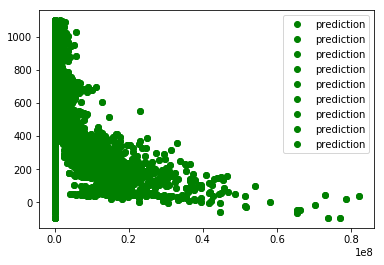

In [35]:
plt.plot(X_n,predicted,'go',label='prediction')
plt.legend()
plt.show()

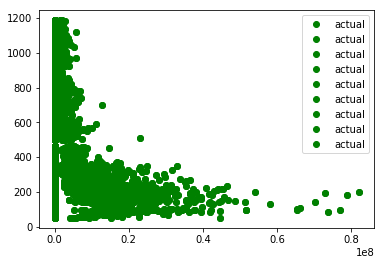

In [36]:
plt.plot(X_n,y_n,'go',label='actual')
plt.legend()
plt.show()

In [37]:
actual = []
for item in y_n.numpy():
    actual.append(item[0])
    

In [38]:
pre = []
for item in predicted:
    pre.append(item[0])

In [39]:
predicted

array([[-58.760643],
       [  2.888244],
       [ 18.96458 ],
       ...,
       [963.9648  ],
       [964.09    ],
       [961.1956  ]], dtype=float32)

In [40]:
x = range(len(X_n))

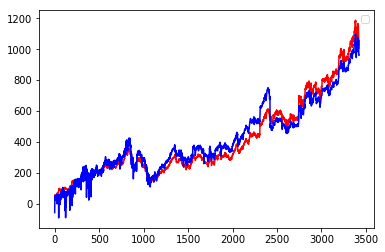

In [47]:
plt.plot(x,actual,color='red',label = "actual")
plt.plot(x,pre,color='blue',label='predicted')
plt.legend()

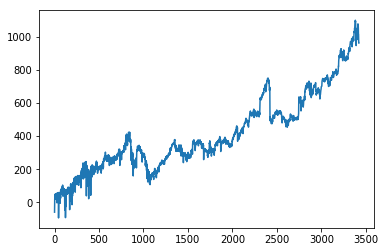